# Sentiment Analysis on Movie Reviews

In [1]:
#importing necssary libraries
import pandas as pd
import re                 
import nltk               
import spacy              
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import numpy as np
import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
  

In [20]:
import string


In [2]:
#reading data
df = pd.read_csv('labeledTrainData.tsv', sep='\t')
 
# printing data
print(df)

            id  sentiment                                             review
0       5814_8          1  With all this stuff going down at the moment w...
1       2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2       7759_3          0  The film starts with a manager (Nicholas Bell)...
3       3630_4          0  It must be assumed that those who praised this...
4       9495_8          1  Superbly trashy and wondrously unpretentious 8...
...        ...        ...                                                ...
24995   3453_3          0  It seems like more consideration has gone into...
24996   5064_1          0  I don't believe they made this film. Completel...
24997  10905_3          0  Guy is a loser. Can't get girls, needs to buil...
24998  10194_3          0  This 30 minute documentary Buñuel made in the ...
24999   8478_8          1  I saw this movie as a child and it broke my he...

[25000 rows x 3 columns]


In [3]:
df.shape

(25000, 3)

In [4]:
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
df.columns

Index(['id', 'sentiment', 'review'], dtype='object')

In [6]:


#descriptive statistics
df.describe()
     


,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [7]:


df.info()
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [8]:
df.isna().sum() #Finding any null values in each column

id           0
sentiment    0
review       0
dtype: int64

In [9]:
df["sentiment"].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

## EDA

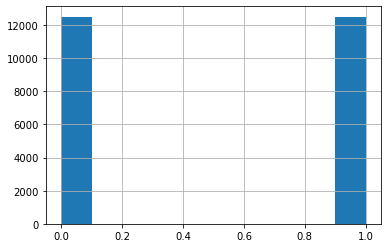

In [10]:
#plotting histogram
df["sentiment"].hist()
plt.show()

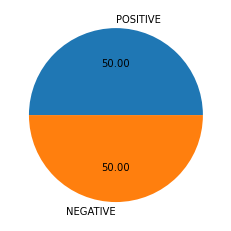

In [11]:
#plotting pie chart
plt.pie(df["sentiment"].value_counts(),labels=["POSITIVE","NEGATIVE"],autopct="%.2f")
plt.show()

**We can see that that the number of positive and negative ratings are equal**

## Data Pre-Processing


In [12]:
df["id"].nunique()

25000

In [13]:


from nltk.corpus import stopwords  ##'stopwords' module allows you to access and use predefined stopword lists for various languages.
from nltk.stem import WordNetLemmatizer,PorterStemmer ##'WordNetLemmatizer' class from NLTK's stem module provides functionality for lemmatization,'PorterStemmer' is a widely used stemming algorithm that applies a set of rules to perform stemming.
     


In [14]:
nltk.download('stopwords')  ##download the necessary stopwords
nltk.download('wordnet')  ##it fetches the WordNet data from the NLTK repository.
     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
import nltk
nltk.download('punkt')
     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:

x = df[["review"]]

In [17]:
x["review"] = x["review"].astype(str)

In [21]:
def clean_text(text):
    def remove_mentions(text):
        # Regular expression pattern to match mentions
        mention_pattern = r'@[\w_]+'

        # Remove mentions using regular expression substitution
        cleaned_text = re.sub(mention_pattern, '', text)

        return cleaned_text

    # Remove mentions from the text
    text = remove_mentions(text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Handling contractions
    contractions = {
        "n't": "not",
        "'s": "is",
        "'re": "are",
        "'ve": "have"

    }
    tokens = [contractions[token] if token in contractions else token for token in tokens]

    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(token) for token in tokens]

    return tokens



x['review_cleaned'] = x['review'].apply(clean_text)


* Removed mentions from the text
* every text is converted to lowercase
* stopwords and punctuation are removed
* Handled contractions
* lemmatization is done


In [22]:


x['review_cleaned'].head()
     


0    [stuff, going, moment, mj, started, listening,...
1    [\the, classic, war, worlds\, '', timothy, hin...
2    [film, start, manager, nicholas, bell, giving,...
3    [must, assumed, praised, film, \the, greatest,...
4    [superbly, trashy, wondrously, unpretentious, ...
Name: review_cleaned, dtype: object

In [27]:


x['review_cleaned'][0]
     


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighty',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'message',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drug',
 'bad',
 "m'kay.",
 'br',
 'br',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fan',
 'would',
 'say',
 'made',
 'fan',
 'true',
 'really',
 'nice',
 'him.',
 'br',
 'br',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'start',
 '20',
 'm

In [30]:
df['review_cleaned'] = x['review_cleaned']

In [31]:

df.head()


,id,sentiment,review,review_cleaned
0,5814_8,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[\the, classic, war, worlds\, '', timothy, hin..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[film, start, manager, nicholas, bell, giving,..."
3,3630_4,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, \the, greatest,..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ..."


In [32]:

from collections import Counter

all_words = [word for sublist in df['review_cleaned'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)  # Change '10' to get more or fewer words

# Print the most common words and their counts
for word, count in most_common_words:
    print(f'{word}: {count}')


br: 101871
'': 65910
movie: 49758
film: 45341
one: 26742
like: 20184
time: 14918
good: 14565
character: 13846
would: 13383


In [33]:

all_words=[]
for i in df['review_cleaned']:
    review = i
    review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
    all_words.append(review)

In [34]:
df_new=df.drop(["id"],axis=1)
df_new.head(5)
     

,sentiment,review,review_cleaned
0,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,..."
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[\the, classic, war, worlds\, '', timothy, hin..."
2,0,The film starts with a manager (Nicholas Bell)...,"[film, start, manager, nicholas, bell, giving,..."
3,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, \the, greatest,..."
4,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ..."


In [35]:


# Save the DataFrame to a CSV file
output_file2 = 'output_file.csv'
df_new.to_csv(output_file2, index=False)  # Set index=False to avoid saving the DataFrame index

In [36]:


from textblob import TextBlob
     


In [37]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_new['polarity_score'] = df_new['review_cleaned'].apply(lambda x : polarity(str(x)))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

df_new['polarity'] = df_new['polarity_score'].map(lambda x: sentiment(x))

In [38]:


def get_data(df_new,senti):
    senti_df = df_new[df_new['polarity']==senti].reset_index()
    return senti_df
p_corpus = get_data(df_new,'positive')
p_corpus=pd.DataFrame(p_corpus)

n_corpus = get_data(df_new,'negative')
n_corpus=pd.DataFrame(n_corpus)

nt_corpus = get_data(df_new,'neutral')
nt_corpus=pd.DataFrame(nt_corpus)
     


In [39]:


p_corpus.shape,n_corpus.shape,nt_corpus.shape
     


((18394, 6), (6580, 6), (26, 6))

In [40]:


df_new.drop('polarity_score',axis=1,inplace=True)
df_new.rename(columns={"polarity": "Sentiment"},inplace=True)
df_new.head()
     


,sentiment,review,review_cleaned,Sentiment
0,1,With all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...",negative
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[\the, classic, war, worlds\, '', timothy, hin...",positive
2,0,The film starts with a manager (Nicholas Bell)...,"[film, start, manager, nicholas, bell, giving,...",negative
3,0,It must be assumed that those who praised this...,"[must, assumed, praised, film, \the, greatest,...",positive
4,1,Superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, wondrously, unpretentious, ...",negative


In [41]:


output_file2 = 'output_file1.csv'
df_new.to_csv(output_file2, index=False)
     


In [42]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
     


In [43]:


corpus=[]
for i in df_new['review_cleaned']:
    review = i
    review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
    corpus.append(review)
     


### Feature Extraction

#### 1:Using Bag of Words

In [44]:
# Converting the Words to Vector using Bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken
X=cv.fit_transform(corpus).toarray()
y=df_new['Sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)
     

## Model Building and Model  Evaluation


In [45]:
#Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))
     

              precision    recall  f1-score   support

    negative       0.77      0.63      0.69      1619
     neutral       0.00      0.00      0.00         1
    positive       0.84      0.91      0.87      3380

    accuracy                           0.82      5000
   macro avg       0.54      0.51      0.52      5000
weighted avg       0.81      0.82      0.81      5000



In [46]:

#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
RandomForestClassifier()
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))
     

              precision    recall  f1-score   support

    negative       0.47      0.85      0.61       735
     neutral       0.00      0.00      0.00         0
    positive       0.97      0.84      0.90      4265

    accuracy                           0.84      5000
   macro avg       0.48      0.56      0.50      5000
weighted avg       0.90      0.84      0.86      5000



In [47]:
#svm model

from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
LinearSVC()
train_pred=SVCmodel.predict(x_train)
test_pred = SVCmodel.predict(x_test)
print(classification_report(test_pred,y_test))
     


              precision    recall  f1-score   support

    negative       0.83      0.80      0.81      1371
     neutral       0.00      0.00      0.00         1
    positive       0.92      0.94      0.93      3628

    accuracy                           0.90      5000
   macro avg       0.59      0.58      0.58      5000
weighted avg       0.90      0.90      0.90      5000



* Linear SVM model has the highest accuracy

In [48]:

def sentiments(test_vec):
    if test_vec == 0:
        print("Negative")
    if test_vec == 1 :
        print("Neutral")
    if test_vec == 2 :
        print("Positive")
     

In [49]:


print('Test 1')
test1 = ["This movie is one among the very few Indian movies, that would never fade away with the passage of time, nor would its spell binding appeal ever diminish, even as the Indian cinema transforms into the abyss of artificially styled pop culture while drill oriented extras take to enhancing the P.T. styled film songs.<br /><br />The cinematography speaks of the excellent skills of Josef Werching that accentuate the monumental and cinema scope effect of the film in its entirety.<br /><br />Gone are the days of great cinema, when every scene had to be clipped many times and retakes taken before finalizing it, while meticulous attention was paid in crafting and editing the scenes. Some of its poignant scenes are filled with sublime emotional intensity, like the instance, when Meena Kumari refuses to say \YES\" as an approval for Nikah (Marriage Bond) and climbs down the hill while running berserk in traumatized frenzy. At the moment, Raj Kumar follows her, and a strong gale of wind blew away the veil of Kumari and onto the legs of Kumar........<br /><br />Kamal Amrohi shall always be remembered with golden words in the annals of Indian Cinema's history for endeavoring to complete this movie in a record setting 12 years. He had to manage filming of some of the vital songs without Meena's close ups, because Meena Kumari, the lady in the lead role was terminally ill and fighting for her life in early 1971."]
test_vec = cv.transform(test1)
predict = SVCmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)
     


Test 1
The Predicted Rating is : ['positive']


In [50]:
print('Test 2')
test2 = ["Unremarkable and unmemorable remake of an old, celebrated English film. Although it may be overly maligned as a total disaster (which it is not), it never builds any tension and betrays its TV origins. Richard Burton sleepwalks through his role, and Sophia Loren's closed (in this movie) face doesn't display much passion, either. (**)"]
test_vec = cv.transform(test2)
predict = SVCmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)

Test 2
The Predicted Rating is : ['negative']


### Using tf- idf

In [51]:


# Converting the Words to Vector using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3),max_features=2500)
X=tf.fit_transform(corpus).toarray()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)
     

In [52]:
#Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))
     

              precision    recall  f1-score   support

    negative       0.37      0.84      0.52       583
     neutral       0.00      0.00      0.00         0
    positive       0.98      0.81      0.89      4417

    accuracy                           0.82      5000
   macro avg       0.45      0.55      0.47      5000
weighted avg       0.91      0.82      0.84      5000



In [53]:

#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
RandomForestClassifier()
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

    negative       0.50      0.83      0.63       792
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.84      0.90      4208

    accuracy                           0.84      5000
   macro avg       0.49      0.56      0.51      5000
weighted avg       0.89      0.84      0.86      5000



In [54]:
#svm model

from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
LinearSVC()
train_pred=SVCmodel.predict(x_train)
test_pred = SVCmodel.predict(x_test)
print(classification_report(test_pred,y_test))
     

              precision    recall  f1-score   support

    negative       0.81      0.86      0.84      1236
     neutral       0.00      0.00      0.00         0
    positive       0.95      0.93      0.94      3764

    accuracy                           0.92      5000
   macro avg       0.59      0.60      0.59      5000
weighted avg       0.92      0.92      0.92      5000



In [55]:

print('Test 1')
test1 = ["This movie is one among the very few Indian movies, that would never fade away with the passage of time, nor would its spell binding appeal ever diminish, even as the Indian cinema transforms into the abyss of artificially styled pop culture while drill oriented extras take to enhancing the P.T. styled film songs.<br /><br />The cinematography speaks of the excellent skills of Josef Werching that accentuate the monumental and cinema scope effect of the film in its entirety.<br /><br />Gone are the days of great cinema, when every scene had to be clipped many times and retakes taken before finalizing it, while meticulous attention was paid in crafting and editing the scenes. Some of its poignant scenes are filled with sublime emotional intensity, like the instance, when Meena Kumari refuses to say \YES\" as an approval for Nikah (Marriage Bond) and climbs down the hill while running berserk in traumatized frenzy. At the moment, Raj Kumar follows her, and a strong gale of wind blew away the veil of Kumari and onto the legs of Kumar........<br /><br />Kamal Amrohi shall always be remembered with golden words in the annals of Indian Cinema's history for endeavoring to complete this movie in a record setting 12 years. He had to manage filming of some of the vital songs without Meena's close ups, because Meena Kumari, the lady in the lead role was terminally ill and fighting for her life in early 1971."]
test_vec = tf.transform(test1)
predict = SVCmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)

Test 1
The Predicted Rating is : ['positive']


In [56]:
print('Test 2')
test2 = ["Unremarkable and unmemorable remake of an old, celebrated English film. Although it may be overly maligned as a total disaster (which it is not), it never builds any tension and betrays its TV origins. Richard Burton sleepwalks through his role, and Sophia Loren's closed (in this movie) face doesn't display much passion, either. (**)"]
test_vec = tf.transform(test2)
predict = SVCmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)

Test 2
The Predicted Rating is : ['positive']


### performance of model evaluation

* svm model shows higher accuracy so we can get better model predictionds using svm model

* svm model has a higher accuracy using tf-idf technique 

* naive bayes show least accuracy among the models